# Greenbergův-Hastingsův model

*KMA/MAE2*

*Jan Půlpán*

GH model je 2D buněčný automat. Model má 3 stavy a používá se při modelování tzv. excitable medium, tedy systém jehož řešením je vlna, kdy následná vlna může vzniknout až po nějakém daném čase. Typicky se s GH modelem pracuje v chemii a medicíně nebo taky v marketingu. Excitable medium je taky např. mexická vlna, tedy způsob fandění na fotbale. My si jako příklad ukážeme ale požár lesa. 

Na rozdíl od jiných buněčných automatů a hlavně ABM modelů, které jsou čistě simulační je GH model i matematicky zaanalyzován. Než si o tom něco povíme tak malá ukázka toho jaký je průběh simulace. Les reprezentujeme mřížkou. Jednotlivé stromy mají 3 různé stavy označené barvou. Zelená znamená zdravý strom, který ale může začít hořet, pokud je vedle něj alespoň 1 hořící strom. Hořící stromy jsou oranžové. čím déle strom hoří, tím je oranžová světlejší. Spálený strom je černý a tím jak se spáleniště regeneruje a vyrůstají nové stromy tak postupně šedne až znovu zezelená. 

In [19]:
import numpy as np
import ipywidgets as widgets

from gh import greenberg_hastings

net_dim = 50
a = 2
g = 10

gh = greenberg_hastings(net_dim=net_dim, a=a, g=g)

fire_size = int(net_dim/5)
fire = np.random.randint(0,a+g-5,(fire_size,fire_size))
ic = np.zeros((net_dim, net_dim))
ic [7:fire_size+7,20:fire_size+20] = fire

gh.simulate(ic, 100, p=1)

interactive_plot = widgets.interactive(gh.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=gh.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t'), Checkbox(value=False, description='labels'), Output…

Popišme si model řečí matematiky. Jako každý celulární automat se i Greenbergův-Hastingsův model skládá ze 4 komponent. $$GH = \{ G,E,U,f\}$$

Pracujeme s pravidelnou čtvercovou konečnou mřížkou. $$G \subset \mathbb{Z}^2$$ 

Uvažujeme van Neumannovo sousedství $U$, jednu buňku tedy ovlivní 4 její sousedi.

<center><img src='vN.png'></center>


Jednotlivé buňky rozdělíme do 3 přihrádek určujících stav. 
- R jako *Rest* - odpočinek nebo klid,
- X jako *Excited* - nadšený, rozrušený, v našem případě hořící,
- F jako *Refractory* - vzpurný, vzdorovitý, ale také žáruvzdorný.

Počet časových jednotek po které buňka zůstane ve stavu $X$ označíme $a$, počet časových jednotek ve stavu $F$ značíme $g$. Na $a, g$ jsou pak ještě dodatečné podmínky. Každá buňka tak nabývá jeden z elementárních stavů:

$$E = \{0,1,\dots,a,a+1,\dots,a+g\}\text{, kde }a,g\geq 1,\; e=a+g \geq 3,\; 1 \leq a \leq e/2$$


Stav jednotlivé buňky $x$ značíme $z(x)$. Lokální dynamické pravidlo je formulováno následovně


$$ \left.f\left( z \right|_{U(x)} \right) = \begin{cases} 1 \text{ pro } z(x)=0 \text{ a } s\geq 1  \\ 
z(x)+1 \text{ pro } 0 < z(x) < e \\
0 \text{ jinak, }\end{cases}$$

kde $s$ je počet sousedů $x$, kteří jsou ve přihrádce $X$.

Model jde matematicky analyzovat a J. Greenberg, C. Greene a S. Hastings v roce 1978 formulovali větu, která na základě počáteční podmínky a jejího vývoje dokáže říct, jestli model skončí periodickým stavem (požárem). Nejprve ale několik definic.

**Definice 1:**  
a) *Vzdálenost* 2 stavů $m,n \in E$ : $$d(m,n) = \min{ \left\{ |m-n|, e+1-|m-n|  \right\} }$$  
b) *Vzdálenost se znaménkem* :
$$ \delta (m,n) = \begin{cases} d(m,n) \textrm{ pokud je oblouk proti směru hodinových ručiček} \\ 
-d(m,n) \text{ jinak } \end{cases}$$

<center><img src='vzdalenost.png'></center>


**Definice 2:**  
*Kružnice* je posloupnost $(x_i, \dots, x_n, x_{n+1}), \; x_i \neq x_j, \, i \neq j, \, i,j=1\dots n$. Navíc $x_{n+1} = x_1$ a $x_{i+1}$ je soused $x_i, \, \forall i = 1 \dots n$ 



**Definice 3:**  
a) Kružnice $C$ je *spojitá* v čase $t$ jestliže: $$d \left( z(x_i)^t, z(x_{i+1})^t \right) \leq a, \; \forall i = 1 \dots n $$
b) *Winding number* $\mathcal{W}_t(C)$ spojité kružnice $C$ v čase $t$ $$\mathcal{W}_t(C) = \frac{1}{e+1} \sum_{i=1}^n \delta \left( z(x_i)^t, z(x_{i+1})^t \right)$$



**Věta: (Greenberg, Greene, Hastings 1978)**  
Něchť $GH$ je Greenbergův-Hastingsův model s parametry $a,g\geq 1, e=a+g \geq 3, 1 \leq a \leq e/2$  
Model má periodické řešení právě tehdy když v nějakém čase $t$ existuje spojitá kružnice $C$ taková, že $\mathcal{W}_t(C) \neq 0$.


## Základní GH model

### Nulové stacionární řešení

In [20]:
net_dim = 11
a = 1
g = 2

gh = greenberg_hastings(net_dim=net_dim, a=a, g=g)

ic = np.zeros((net_dim,net_dim))
ic[int(net_dim/2), int(net_dim/2)] = 1
ic[int(net_dim/2)+1, int(net_dim/2)+1] = 3

gh.simulate(ic, 20)

interactive_plot = widgets.interactive(gh.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=gh.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t', max=20), Checkbox(value=False, description='labels')…

### Periodické stacionární řešení

In [21]:
net_dim = 11
a = 1
g = 2

gh = greenberg_hastings(net_dim=net_dim, a=a, g=g)


ic = np.zeros((net_dim,net_dim))
ic[int(net_dim/2), int(net_dim/2)] = 1
ic[int(net_dim/2), int(net_dim/2)+1] = 2
ic[int(net_dim/2)+1, int(net_dim/2)+1] = 3

gh.simulate(ic, 20)

interactive_plot = widgets.interactive(gh.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=gh.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t', max=20), Checkbox(value=False, description='labels')…

### Větší model, náhodná počáteční podmínka

In [22]:
net_dim = 100
a = 10
g = 50

gh = greenberg_hastings(net_dim=net_dim, a=a, g=g)

fire_size = int(net_dim/5)
fire = np.random.randint(0,a+g-3,(fire_size,fire_size))
ic = np.zeros((net_dim, net_dim))
ic [7:fire_size+7,20:fire_size+20] = fire

gh.simulate(ic, 1000)

interactive_plot = widgets.interactive(gh.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=gh.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t', max=1000), Checkbox(value=False, description='labels…

## Porovnání se spojitým SIR modelem

Stejný požár lesa, jen jako bezprostorový model, jsme schopni popsat pomocí SIR modelu a diferenciálních rovnic. V našem případě jde o variantu SIRS.

$$\begin{align*}
\frac{dS}{dt} &= - \frac{\beta I S}{N} + \nu R,\\
\frac{dI}{dt} &= \frac{\beta I S}{N}  - \gamma I,\\
\frac{dR}{dt} &= \gamma I - \nu R.\\
\end{align*}$$

kdy $\nu = 1/g$ a $\gamma = 1/a$.

Jednotlivé přihrádky pak můžeme přiřadit následovně:

- $S$ jako *Susceptible* odpovídá $R$ jako *Rest*,
- $I$ jako *Infected* odpovídá $X$ jako *Excited*,
- $R$ jako *Removed* odpovídá $F$ jako *Refactory*.

Oba modely mají 2 různá stacionární řešení - nulové a periodické (u spojitého SIRS je asymptoticky stabilní). Oba modely jsou také schopny aproximovat ten druhý. 


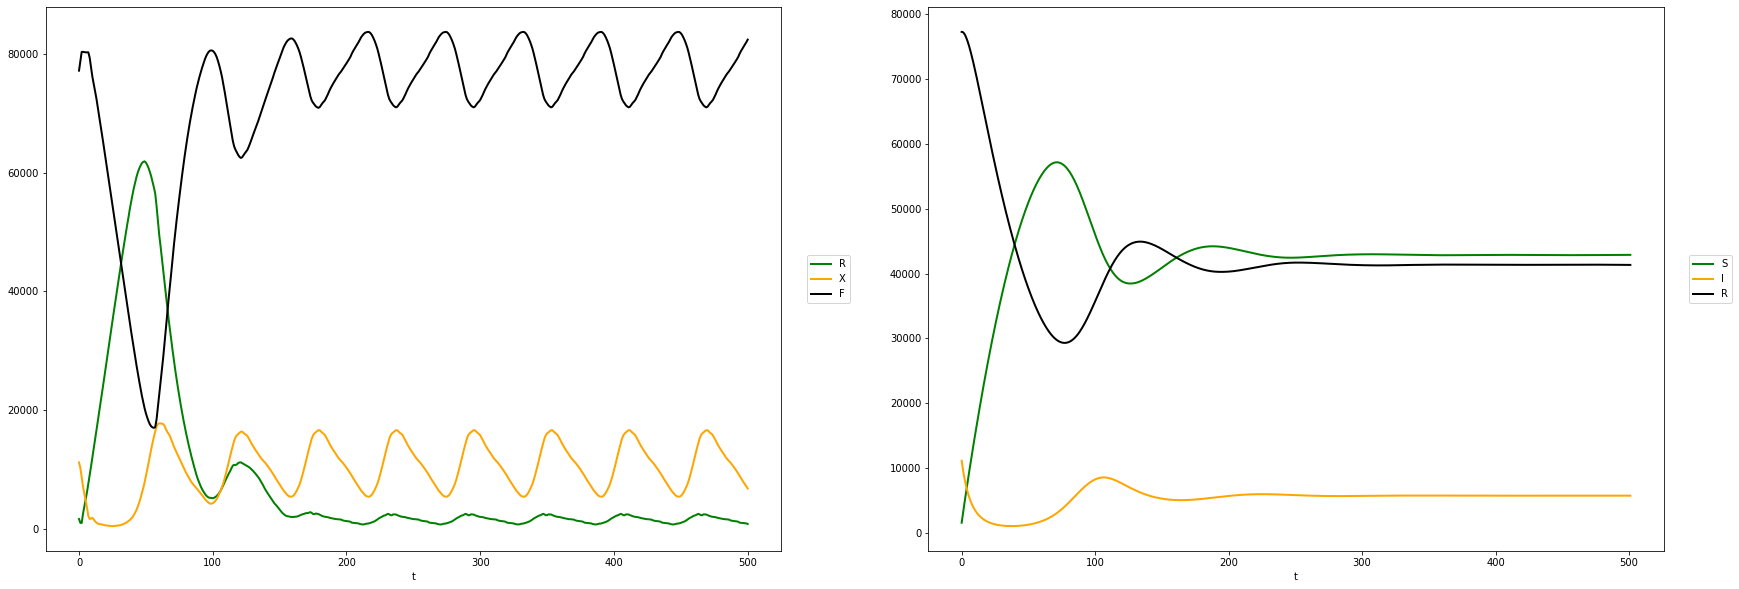

In [23]:
net_dim = 300
a = 7
g = 50

gh = greenberg_hastings(net_dim=net_dim, a=a, g=g)

ic = np.random.randint(0,a+g-1,(net_dim,net_dim))

gh.simulate(ic, 500)
gh.plot_sol()

## Přidaná stochasticita

Dynamické pravidlo můžeme modifikovat. Řekněme, že strom vzplane od svého souseda s pravděpodobností $p$. Čím více hořících sousedů strom má, s tím větší pravděpodobností od nich tedy začne sám hořet. Nové lokální dynamické pravidlo má tvar

$$ \left.f\left( z \right|_{U(x)} \right) = \begin{cases} 1 \text{ pro } z(x)=0 \textrm{ s pravděpodobností   } 1-(1-p)^s  \\ 
z(x)+1 \text{ pro } 0 < z(x) < e \\
0 \text{ jinak, }\end{cases}$$

kde $s$ je počet sousedních buněk ve stavu $X$ a $p$ je pravděpodobnost, že se strom zapálí od svého souseda. Kvůli této úpravě už není tedy platná ani věta Greenberg-Greene-Hastings.

Čím větší pravděpodobnost $p$ bude, čím více se bude blížit k $1$, tím více se bude blížit výsledné řešení k jednomu z tvarů které jsme viděli u GH modelu. To si ukážeme na příkladech.



In [24]:
net_dim = 11
a = 1
g = 2

gh = greenberg_hastings(net_dim=net_dim, a=a, g=g)

ic = np.zeros((net_dim,net_dim))
ic[int(net_dim/2), int(net_dim/2)] = 1
ic[int(net_dim/2)+1, int(net_dim/2)+1] = 3

gh.simulate(ic, 150, p=.8)

interactive_plot = widgets.interactive(gh.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=gh.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t', max=150), Checkbox(value=False, description='labels'…

In [ ]:
gh.plot_sol(sir=False)

In [26]:
net_dim = 11
a = 1
g = 2

gh = greenberg_hastings(net_dim=net_dim, a=a, g=g)


ic = np.zeros((net_dim,net_dim))
ic[int(net_dim/2), int(net_dim/2)] = 1
ic[int(net_dim/2), int(net_dim/2)+1] = 2
ic[int(net_dim/2)+1, int(net_dim/2)+1] = 3

gh.simulate(ic, 150, p =.5)

interactive_plot = widgets.interactive(gh.plot_sim_state, 
                               t = widgets.IntSlider(min=0, max=gh.iters_no, step=1, value=0)) 
interactive_plot

interactive(children=(IntSlider(value=0, description='t', max=150), Checkbox(value=False, description='labels'…

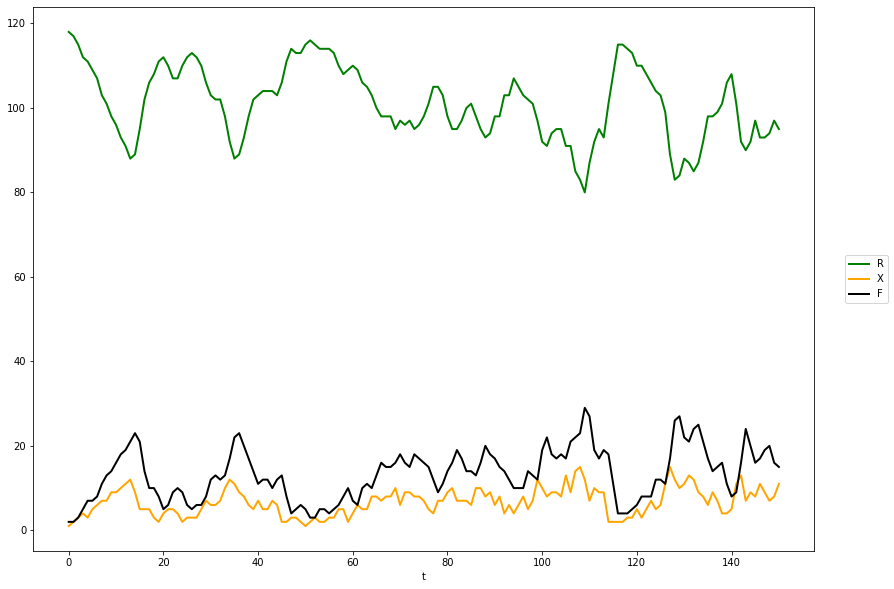

In [12]:
gh.plot_sol(sir=False)